# Práctica 2 : Regresión Logística

Guillermo García Patiño Lenza y Mario Quiñones Pérez

In [2]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt

## Parte 1:

### Carga y visualización de los datos

In [3]:
def cargaDatos(fichero):
    datos = read_csv(fichero, header = None).to_numpy()
    return datos.astype(float)

In [4]:
def crearGrafica(datos, labels = ['y = 1', 'y = 0']):
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    c1 = np.where(Y == 1)
    c2 = np.where(Y == 0)
    
    plt.scatter(X[c1,0], X[c1,1] , marker = '+', c = 'k', label = labels[0])
    plt.scatter(X[c2,0], X[c2,1], marker = 'o', c = 'y', label = labels[1])
    plt.legend(loc = 'upper right')
    plt.show()

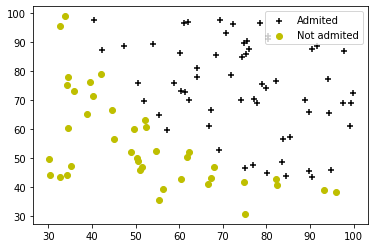

In [8]:
crearGrafica(cargaDatos("ex2data1.csv"), ['Admited', 'Not admited'])

### Funcion Sigmoide

In [5]:
def sigmoide(Z):
    sigmoide = 1 / (1 + np.exp(-Z))
    return sigmoide

### Cálculo de la función de coste y gradiente

In [6]:
def normalizar(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return(X_norm, mu, sigma)

In [20]:
def coste(Theta, X, Y):
    G = sigmoide(np.dot(X, Theta))
    sum1 = np.dot(Y, np.log(G))
    sum2 = np.dot((1-Y), np.log(1 - G))
    return (-1 / X.shape[0]) * (sum1 + sum2)

In [21]:
def gradiente(Theta, X, Y):
    m = X.shape[0]
    G = sigmoide( np.matmul(X,Theta) )
    gradiente  = (1 / len(Y)) * np.matmul(X.T, G - Y)
    return gradiente

In [22]:
def prueba():
    datos = cargaDatos("ex2data1.csv")
    X = datos[:,:-1]
    Y = datos[:,-1]
    n = len(Y)
    
    X2,mu,sigma = normalizar(X)
    X2 = np.hstack([np.ones([n,1]), X2])
    
    c = coste(np.zeros(X2.shape[1]), X2, Y)
    gr = gradiente(np.zeros(X2.shape[1]),X2,Y)
    print(gr)
    print(c)

In [31]:
prueba()

[-0.1        -0.28122914 -0.25098615]
0.6931471805599452


### Cálculo del valor óptimo de los parámetros

In [65]:
def optimiza(datos = cargaDatos("ex2data1.csv")):
    X = datos[:,:-1]
    Y = datos[:,-1]
    m = X.shape[0]
    n = len(Y)
    
    X_n, mu, sigma = normalizar(X)
    
    X_n = np.hstack([np.ones([n,1]), X_n])
    T = np.zeros(X.shape[1]+1)

    result = opt.fmin_tnc(func = coste, x0 = T, fprime = gradiente, args = (X_n, Y))
    c_f = coste(result[0], X_n, Y )
    print(c_f)
    print(result[0])
    return result[0]

In [66]:
optimiza()


0.20349771564637412
[1.71787865 3.99150585 3.72363973]


array([1.71787865, 3.99150585, 3.72363973])

In [60]:
def crearGraficaConFrontera(datos, Theta, labels = ['y = 1', 'y = 0']):
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    c1 = np.where(Y == 1)
    c2 = np.where(Y == 0)
    
    plt.scatter(X[c1,0], X[c1,1] , marker = '+', c = 'k', label = labels[0])
    plt.scatter(X[c2,0], X[c2,1], marker = 'o', c = 'y', label = labels[1])
    plt.legend(loc = 'upper right')
    
    
    

0.20349771564637412
[1.71787865 3.99150585 3.72363973]


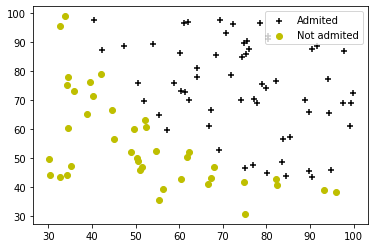

In [64]:
crearGraficaConFrontera(cargaDatos("ex2data1.csv"),optimiza(),['Admited', 'Not admited'])

In [131]:

# no entiendo por qué esto no va XDDDDDDDD

def pinta_frontera_recta(datos, theta):    
    
    X = datos[:,:-1]
    Y = datos[:,-1]
    
    plt.figure() 
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()    
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))   
    h = sigmoide(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(theta))   
    h = h.reshape(xx1.shape)    
    # el cuarto parámetro es el valor de z cuya frontera se    
    # quiere pintar    
    plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')    
    plt.savefig("frontera.pdf")    
    plt.close()

In [63]:
pinta_frontera_recta(cargaDatos("ex2data1.csv"),optimiza())

0.20349771564637412
[1.71787865 3.99150585 3.72363973]


<ipython-input-62-2b9b0964198e>:14: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')


### Evaluación de la regresión

In [120]:
def evalua(datos, parte_entrenamiento):
    f = round(len(datos) * parte_entrenamiento / 100)
    datos_ent = datos[:f]
    datos_eva = datos[f:]
    
    theta = optimiza(datos_ent)
    
    dat_ev_x = datos_eva[:,:-1]
    dat_ev_y = datos_eva[:,-1]
    
    dat_ev_x_n, mu, sigma = normalizar(dat_ev_x)
    dat_ev_x_n = np.hstack([np.ones([len(datos_eva),1]), dat_ev_x_n])
    
    res_eva = np.dot(dat_ev_x_n, theta)
    res_eva_m = [] 
    for e in map(lambda x : 1 if x >= 0.5 else 0, res_eva):
        res_eva_m.append(e)
        
    iguales = filter(lambda x : dat_ev_y[res_eva_m.index(x)] == x , res_eva_m)
    
    i = 0;
    for e in iguales:
        i = i+1
    
    print("Se ha predicho correctamente el resultado un {}% de las veces".format(i/len(datos_eva) * 100))
    
    return (i/len(datos_eva)*100)

In [121]:
evalua(cargaDatos("ex2data1.csv"), 75)

0.19456570964463282
[0.63167769 4.1627765  3.60606696]
Se ha predicho correctamente el resultado un 48.0% de las veces


48.0